In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [9]:
data = pd.read_csv("../raw_data/final_file_with_all_features.csv",low_memory=False)

## Variables 

In [56]:
X = data.drop("Age abandoned school", axis=1)
y = data["Age abandoned school"]

In [57]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Age abandoned school, dtype: float64

In [58]:
X.head()

,hhid,Gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,...,child_enrollment,class_when_dropout,region,province,schoolunitid,type_unit,groupid,num_menage,done_test,work_activity_classified
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,...,1.0,0.0,Marrakech - Tensift - Al Haouz,Essaouira,A208,Secteur Scolaire Centre,2,4,1.0,1.0
1,A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,...,1.0,0.0,Marrakech - Tensift - Al Haouz,Essaouira,A426,Secteur Scolaire Centre,4,2,2.0,0.0
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,...,1.0,0.0,Marrakech - Tensift - Al Haouz,Chichaoua,A268,Satellite,1,6,1.0,0.0
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,...,1.0,0.0,Sous - Massa - Draa,Taroudant,A419,Secteur Scolaire Centre,2,4,2.0,0.0
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,...,1.0,0.0,Marrakech - Tensift - Al Haouz,Essaouira,A536,Satellite,1,6,1.0,1.0


In [59]:
X.columns

Index(['hhid', 'Gender', 'mother_alive', 'father_alive', 'parents_age',
       'marital_status', 'darija', 'class_arabic', 'french', 'amazygh',
       'read_one_lang', 'write_one_lang', 'no_read_write', 'parents_level_ed',
       'num_per_house', 'type_housing', 'automobiles', 'mobile_phones',
       'satellite', 'no_water', 'individual_water_net', 'electrical_net_co',
       'school_id', 'child_enrollment', 'class_when_dropout', 'region',
       'province', 'schoolunitid', 'type_unit', 'groupid', 'num_menage',
       'done_test', 'work_activity_classified'],
      dtype='object')

In [60]:
X = X.drop(columns={"type_unit","groupid","num_menage","child_enrollment","class_when_dropout","schoolunitid","school_id","done_test"})

In [61]:
X.shape

(4052, 25)

In [62]:
X.head()

,hhid,Gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,...,type_housing,automobiles,mobile_phones,satellite,no_water,individual_water_net,electrical_net_co,region,province,work_activity_classified
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,...,3.0,2.0,1.0,1.0,2,2,1,Marrakech - Tensift - Al Haouz,Essaouira,1.0
1,A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,...,3.0,2.0,1.0,2.0,2,2,1,Marrakech - Tensift - Al Haouz,Essaouira,0.0
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,Chichaoua,0.0
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,...,1.0,2.0,1.0,1.0,2,2,1,Sous - Massa - Draa,Taroudant,0.0
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,...,3.0,2.0,1.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,Essaouira,1.0


## Pipeline building

In [63]:
# test/train split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train_num = X.select_dtypes(include=["float64","int64"])
X_train_cat = X[["region","province"]]

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3241, 25), (811, 25), (3241,), (811,))

In [65]:
# Numerical Features

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('standard_scaler', StandardScaler())])


In [66]:
# Categorical features 

cat_transformer = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [67]:
# Build our preprocessor

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, X_train_num.columns),
    ('cat_transformer', cat_transformer, X_train_cat.columns)])


In [68]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [69]:
feature_names = preprocessor.named_transformers_['cat_transformer']\
    .named_steps['one_hot_encoder'].get_feature_names_out(X_train_cat.columns)

# Create a new DataFrame with preprocessed features and updated column names
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=list(X_train_num.columns) + list(feature_names))

In [70]:
X_train_preprocessed_df.head()

,Gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,...,province_Essaouira,province_Ifrane,province_Jerada,province_Khenifra,province_Meknes,province_Nador,province_Ouarzazate,province_Taourirt,province_Taroudant,province_Tiznit
0,-0.127695,1.185697,-1.252096,-1.963534,-0.13536,-0.438833,0.392556,0.159656,-0.558004,0.619922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.127695,-0.848095,-1.252096,0.678763,-0.13536,-0.438833,0.392556,0.159656,-0.558004,0.619922,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.127695,-0.848095,-1.252096,-1.117999,-0.13536,-0.438833,0.392556,0.159656,1.798138,0.619922,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.127695,-0.848095,-1.252096,-0.272464,-0.13536,-0.438833,0.392556,0.159656,-0.558004,-1.652660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.127695,-0.848095,-1.252096,0.150304,-0.13536,-0.438833,-2.556123,-6.285604,-0.558004,-1.652660,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X_train_preprocessed_df.shape

(3241, 44)

## Modelling

In [136]:
def perform(y_true, y_pred):
    print("Precision : ", precision_score(y_true, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_true, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1 Score : ", f1_score(y_true, y_pred, average = 'micro'))
    cm = confusion_matrix(y_true, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_true, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm)
    cm.plot()

### XGBoost

In [137]:
model_xgb = XGBClassifier(booster='gblinear',
                        eta=0.1,
                        max_depth=8,
                        alpha=0.3
                         )

model_xgb.fit(X_train_preprocessed_df, y_train)

[17:14:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(alpha=0.3, base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None, gamma=None,
              gpu_id=-1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, predictor=None, random_state=0, ...)

In [138]:
X_test_num = X.select_dtypes(include=["float64","int64"])
X_test_cat = X[["region","province"]]

In [139]:
X_test_preprocessed = preprocessor.fit_transform(X_test)
feature_names = preprocessor.named_transformers_['cat_transformer']\
    .named_steps['one_hot_encoder'].get_feature_names_out(X_test_cat.columns)

# Create a new DataFrame with preprocessed features and updated column names
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=list(X_test_num.columns) + list(feature_names))

In [140]:
y_pred_xgb = model_xgb.predict(X_test_preprocessed_df)

Precision :  0.750924784217016
Recall :  0.750924784217016
Accuracy :  0.750924784217016
F1 Score :  0.7509247842170161

 [[  0 202]
 [  0 609]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       202
         1.0       0.75      1.00      0.86       609

    accuracy                           0.75       811
   macro avg       0.38      0.50      0.43       811
weighted avg       0.56      0.75      0.64       811

******************************************************



/Users/Neyla/.pyenv/versions/dropoutpred-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Neyla/.pyenv/versions/dropoutpred-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Neyla/.pyenv/versions/dropoutpred-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

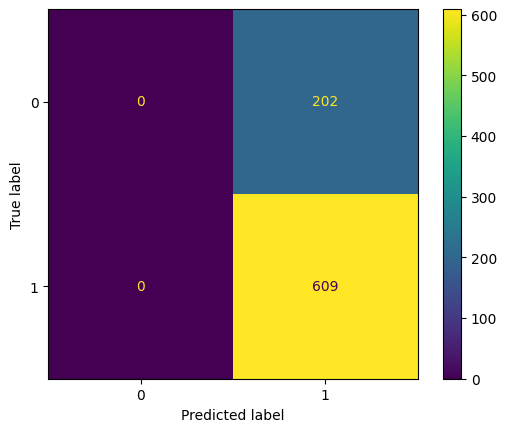

In [141]:
perform(y_test, y_pred_xgb)

### Support Vector Classifier

In [133]:
model_svc = SVC(kernel='rbf', gamma=4, C=1)
model_svc.fit(X_train_preprocessed_df, y_train) 

SVC(C=1, gamma=4)

In [134]:
y_pred_svc = model_svc.predict(X_test_preprocessed_df)

Precision :  0.7459926017262639
Recall :  0.7459926017262639
Accuracy :  0.7459926017262639
F1 Score :  0.7459926017262638

 [[  4 198]
 [  8 601]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.33      0.02      0.04       202
         1.0       0.75      0.99      0.85       609

    accuracy                           0.75       811
   macro avg       0.54      0.50      0.45       811
weighted avg       0.65      0.75      0.65       811

******************************************************



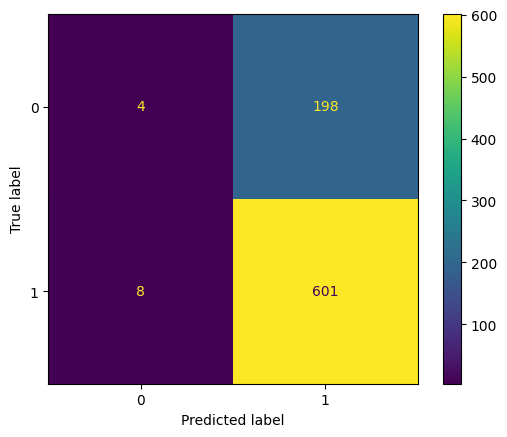

In [142]:
perform(y_test, y_pred_svc)